# Reading and Knowing Data

In [478]:
import pandas as pd
import numpy as np

In [479]:
imdb=pd.read_csv('IMDB-Movie-Data.csv')

In [480]:
imdb.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Data Visualization

In [481]:
import matplotlib.pyplot as plt

In [482]:
import seaborn as sb

In [483]:
imdb.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [484]:
movie_yearly_count = imdb['Year'].value_counts().sort_index(ascending=False)

In [485]:
movie_yearly_count

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2009     51
2008     52
2007     53
2006     44
Name: Year, dtype: int64

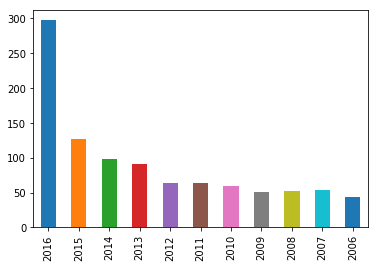

In [486]:
movie_yearly_count.plot(kind='bar')

In [487]:
movies_comparisons = ['Revenue (Millions)', 'Metascore', 'Runtime (Minutes)', 'Votes','Year']

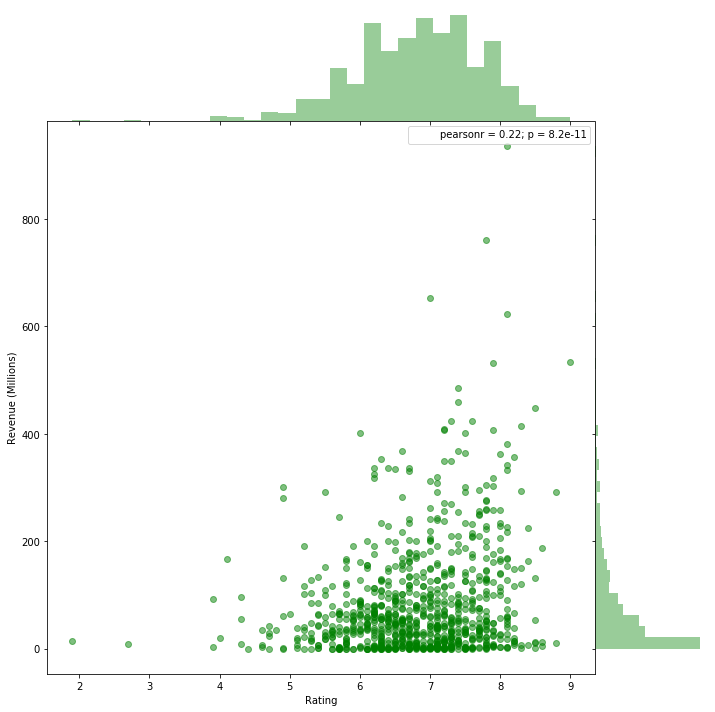

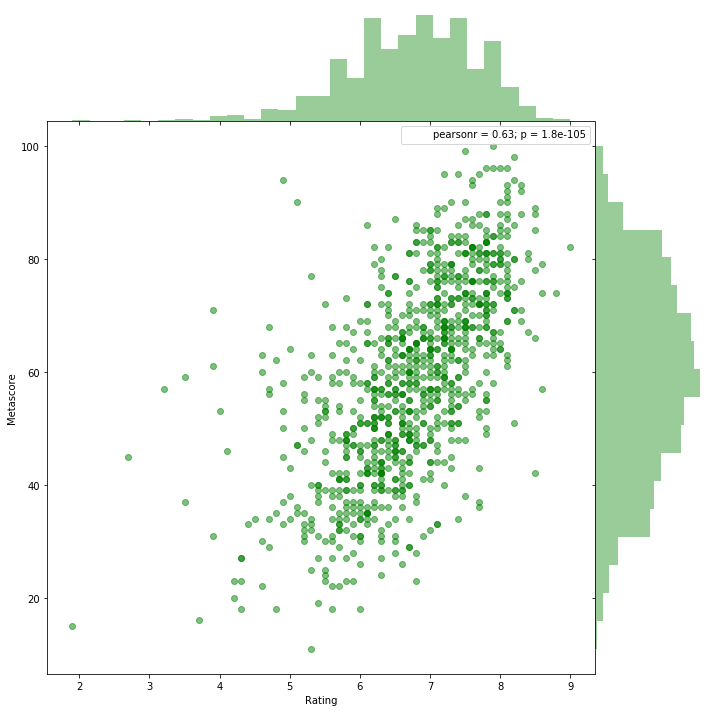

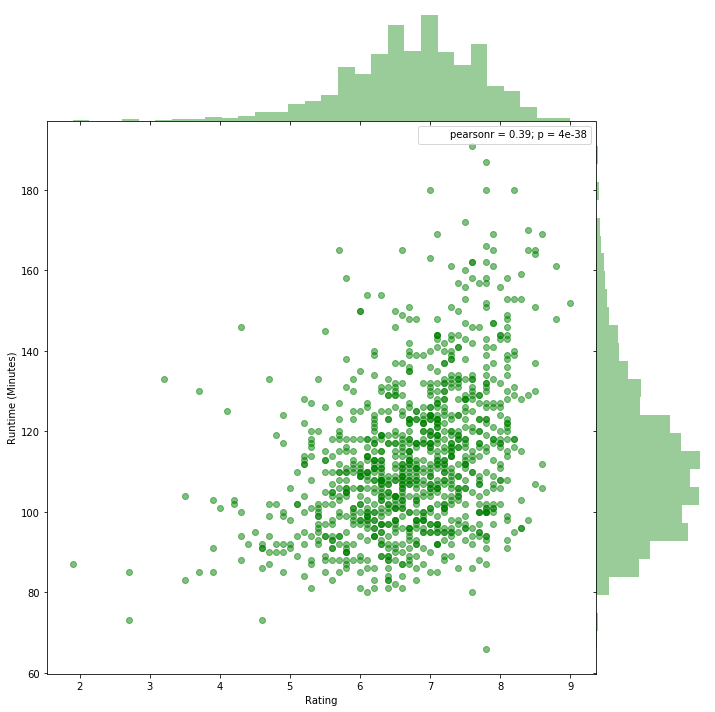

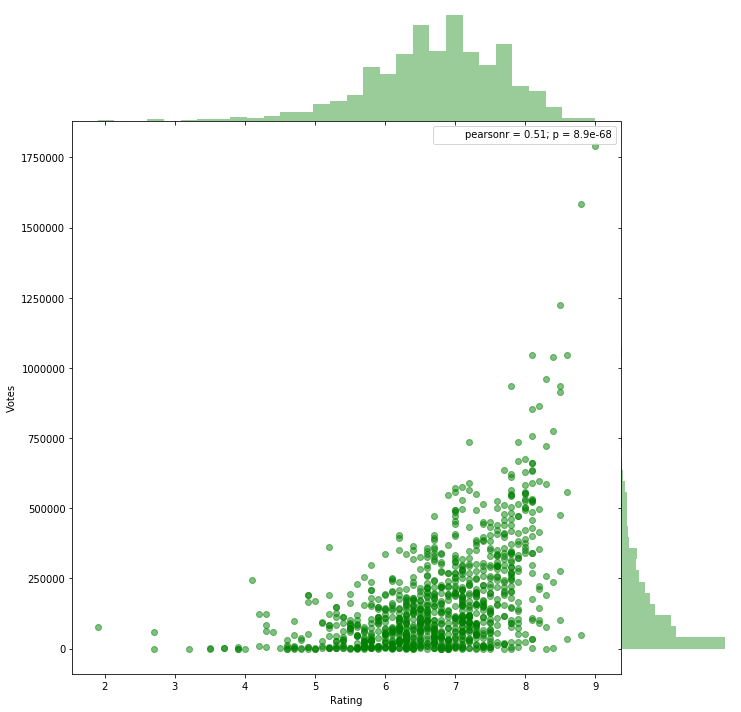

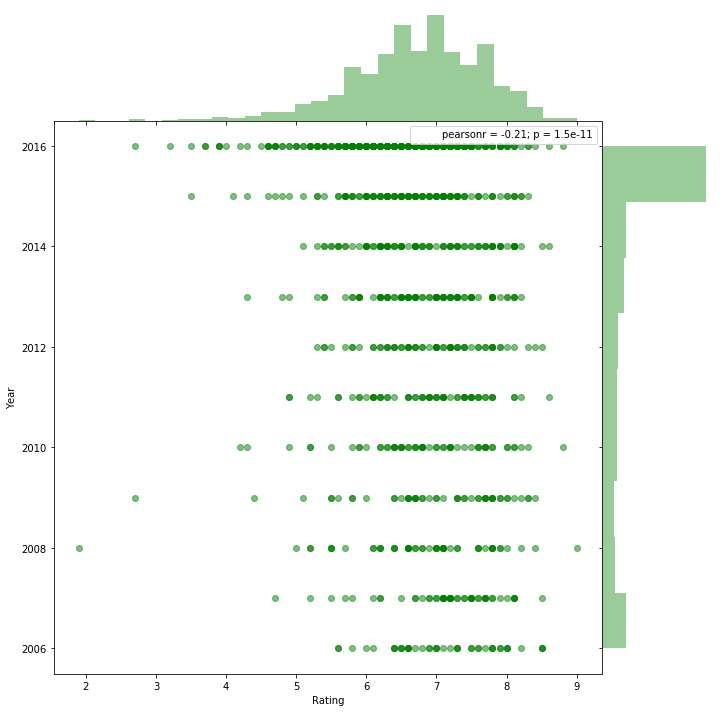

In [488]:
for comparison in movies_comparisons:
    sb.jointplot(x='Rating', y=comparison, data=imdb, alpha=0.5, color='g', size=10, space=0)

In [489]:
import itertools

In [490]:
unique_genres = imdb['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

Number of movies in each genre:
Thriller 195
Sport 18
Sci-Fi 120
Action 303
Animation 49
Comedy 279
Fantasy 101
Romance 141
Music 21
History 29
Western 7
Adventure 259
Biography 81
Crime 150
War 13
Drama 513
Family 51
Mystery 106
Musical 5
Horror 119


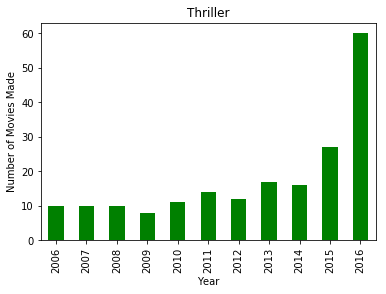

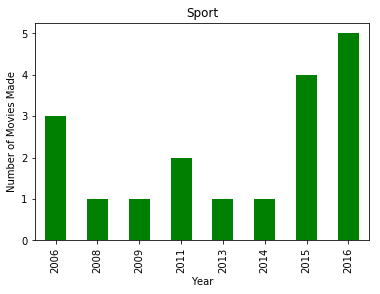

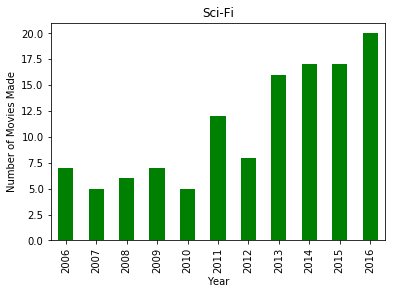

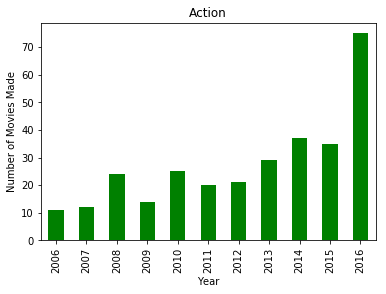

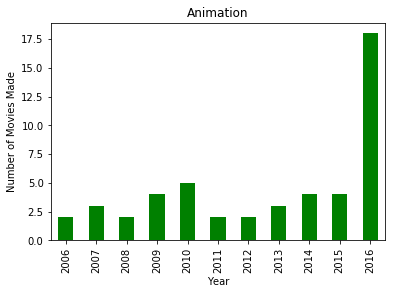

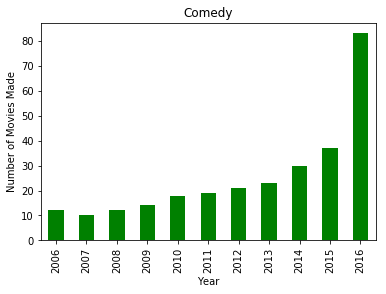

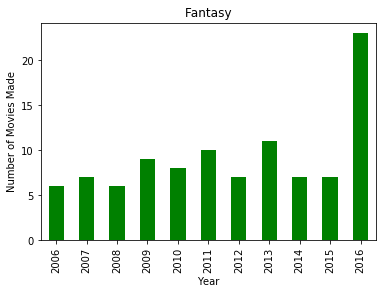

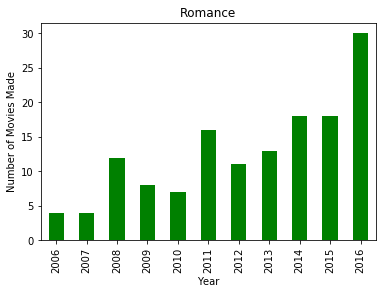

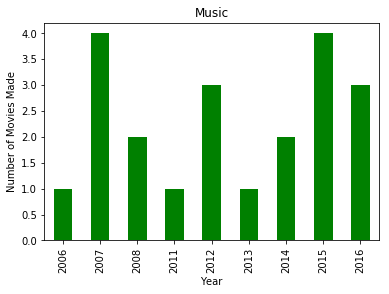

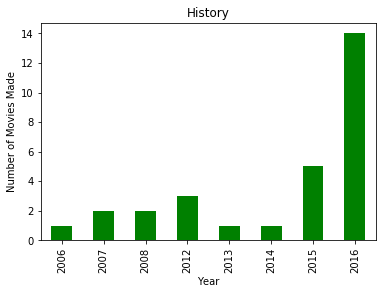

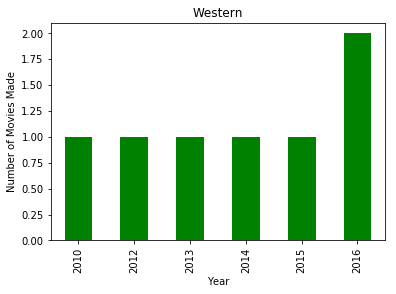

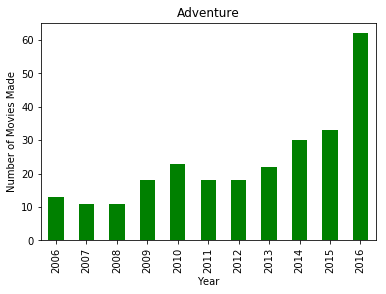

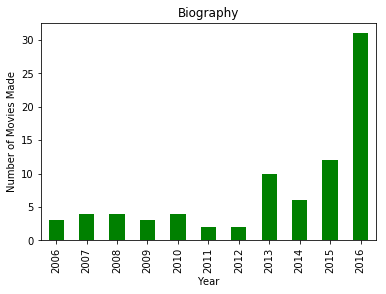

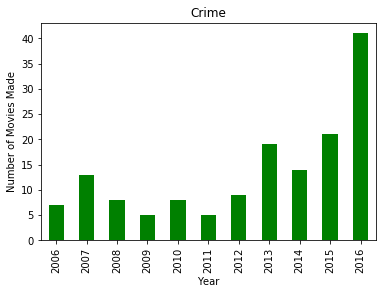

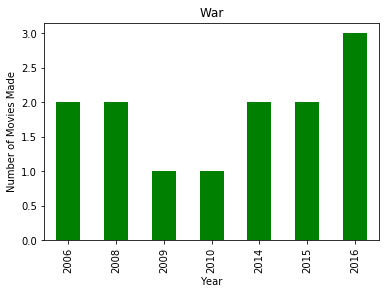

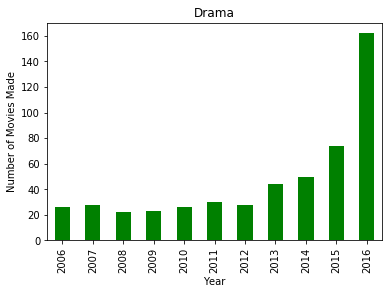

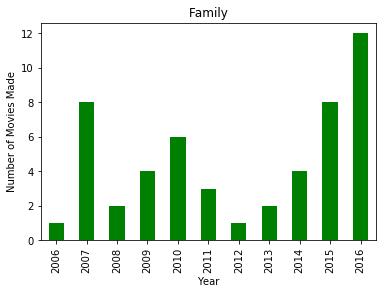

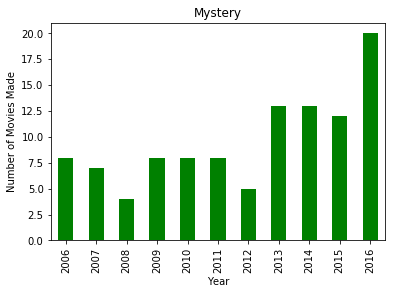

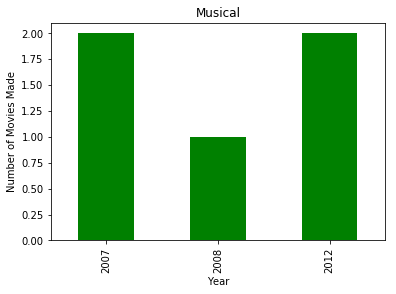

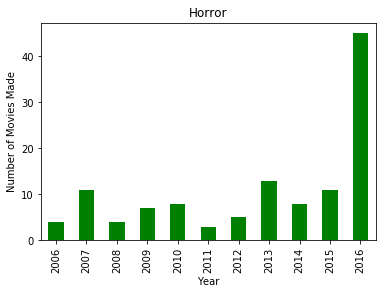

In [491]:
print('Number of movies in each genre:')

for genre in individual_genres:
    current_genre = imdb['Genre'].str.contains(genre).fillna(False)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies Made')
    plt.title(str(genre))
    imdb[current_genre].Year.value_counts().sort_index().plot(kind='bar', color='g')
 
    print(genre, len(imdb[current_genre]))
   

Text(0,1,'Voting VS Rating')

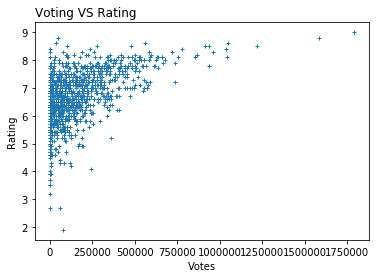

In [492]:
plt.plot( 'Votes', 'Rating', data=imdb, linestyle='', marker='+', markersize=4)
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.title('Voting VS Rating', loc='left')


# Feature Engineering

Since I am predicting the rating of movies before the release, I will be using the features that are relevant before the movie is released. 
<n> 
    <li>Runtime</li>
    <li>Year</li>
    <li>Genre</li>
    <li>Description</li>
    <li>Metascore</li>
    <li>Votes</li>

## Value_count

In [493]:
imdb['Genre'].value_counts()

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Romance                26
Crime,Drama,Thriller          24
Crime,Drama,Mystery           23
Action,Adventure,Drama        18
Action,Crime,Drama            17
Horror,Thriller               16
Drama,Thriller                15
Biography,Drama               14
Biography,Drama,History       14
Action,Adventure,Comedy       14
Adventure,Family,Fantasy      14
Action,Crime,Thriller         12
Action,Comedy,Crime           12
Horror                        11
Action,Adventure,Thriller     11
Crime,Drama                   10
Action,Thriller                9
Animation,Action,Adventure     9
Biography,Crime,Drama          9
Thriller                       9
Horror,Mystery,Thriller        9
Biography,Drama,Sport          8
          

In [494]:
imdb['Director'].value_counts()

Ridley Scott             8
David Yates              6
M. Night Shyamalan       6
Michael Bay              6
Paul W.S. Anderson       6
Peter Berg               5
David Fincher            5
Antoine Fuqua            5
J.J. Abrams              5
Martin Scorsese          5
Woody Allen              5
Justin Lin               5
Denis Villeneuve         5
Christopher Nolan        5
Zack Snyder              5
Danny Boyle              5
Gore Verbinski           4
Dennis Dugan             4
Louis Leterrier          4
Steven Spielberg         4
Lars von Trier           4
Matthew Vaughn           4
D.J. Caruso              4
Ron Howard               4
Jon Favreau              4
Quentin Tarantino        4
Clint Eastwood           4
Robert Zemeckis          4
Peter Jackson            4
Alexandre Aja            4
                        ..
Justin Tipping           1
Peter Billingsley        1
Theodore Melfi           1
Nacho Vigalondo          1
Andy Fickman             1
Chris Weitz              1
M

## Data_mapping

In [495]:
data=[imdb]
data_mapping={'Action,Adventure,Sci-Fi':0,       
'Drama':1,                         
'Comedy,Drama,Romance':2,          
'Comedy':3,                        
'Drama,Romance':4,                 
'Comedy,Drama':5,                  
'Animation,Adventure,Comedy ':6,   
'Action,Adventure,Fantasy':7,      
'Comedy,Romance':8,                
'Crime,Drama,Thriller':9,          
'Crime,Drama,Mystery':10,           
'Action,Adventure,Drama':11,        
'Action,Crime,Drama':12,            
'Horror,Thriller':13,               
'Drama,Thriller':14,                
'Biography,Drama':15,               
'Biography,Drama,History':16,       
'Action,Adventure,Comedy':17,       
'Adventure,Family,Fantasy':18,      
'Action,Crime,Thriller':19,         
'Action,Comedy,Crime':20,           
'Horror':21,                        
'Action,Adventure,Thriller':22,     
'Crime,Drama':23,                   
'Action,Thriller':24,                
'Animation,Action,Adventure':25,     
'Biography,Crime,Drama':26,          
'Thriller':27,                       
'Horror,Mystery,Thriller':28,        
'Biography,Drama,Sport':29}

for dataset in data:
    dataset['genre']=dataset['Genre'].map(data_mapping)

In [496]:
common_value='0'
imdb['genre']=imdb['genre'].fillna(common_value)

In [497]:
imdb.head(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,0


In [498]:
imdb['Runtime (Minutes)'].value_counts().sort_index(ascending=True)

66      1
73      2
80      2
81      5
82      1
83      6
84      3
85      9
86      8
87      9
88     15
89     11
90      9
91     13
92     22
93     11
94     20
95     22
96     19
97     22
98     22
99     16
100    28
101    22
102    25
103    14
104    23
105    17
106    26
107    20
       ..
142     3
143     6
144     8
145     1
146     5
147     3
148     5
149     2
150     4
151     4
152     2
153     4
154     2
156     2
157     3
158     4
159     1
160     1
161     3
162     3
163     1
164     1
165     5
166     1
169     3
170     1
172     1
180     3
187     1
191     1
Name: Runtime (Minutes), Length: 94, dtype: int64

In [499]:
imdb['Metascore'].describe()

count    936.000000
mean      58.985043
std       17.194757
min       11.000000
25%       47.000000
50%       59.500000
75%       72.000000
max      100.000000
Name: Metascore, dtype: float64

In [500]:
data=[imdb]
for dataset in data:
    dataset['Runtime (Minutes)']=dataset['Runtime (Minutes)'].astype(int)
    dataset.loc[ dataset['Runtime (Minutes)'] <= 66, 'Runtime (Minutes)'] = 1
    dataset.loc[(dataset['Runtime (Minutes)'] > 66) & (dataset['Runtime (Minutes)'] <= 90), 'Runtime (Minutes)'] = 2
    dataset.loc[(dataset['Runtime (Minutes)'] > 90) & (dataset['Runtime (Minutes)'] <= 120), 'Runtime (Minutes)'] = 3
    dataset.loc[(dataset['Runtime (Minutes)'] > 120) & (dataset['Runtime (Minutes)'] <= 140), 'Runtime (Minutes)'] = 4
    dataset.loc[(dataset['Runtime (Minutes)'] > 140) & (dataset['Runtime (Minutes)'] <= 160), 'Runtime (Minutes)'] = 5
    dataset.loc[(dataset['Runtime (Minutes)'] > 160) & (dataset['Runtime (Minutes)'] <= 180), 'Runtime (Minutes)'] = 6
    dataset.loc[dataset['Runtime (Minutes)'] > 180, 'Runtime (Minutes)']=7

In [501]:
imdb['Runtime (Minutes)'].describe()

count    1000.000000
mean        3.322000
std         0.819138
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: Runtime (Minutes), dtype: float64

In [509]:
imdb=imdb.fillna(imdb.median())

In [513]:
imdb.loc[:,['Runtime (Minutes)','Year','genre','Metascore','Votes']]


,Runtime (Minutes),Year,genre,Metascore,Votes
0,4,2014,0,76.000000,757074
1,4,2012,0,65.000000,485820
2,3,2016,13,62.000000,157606
3,3,2016,0,59.000000,60545
4,4,2016,7,40.000000,393727
5,3,2016,7,42.000000,56036
6,4,2016,0,93.000000,258682
7,2,2016,3,71.000000,2490
8,5,2016,0,78.000000,7188
9,3,2016,0,41.000000,192177


# Modelling

In [522]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [516]:
X=imdb.loc[:,['Runtime (Minutes)','Year','genre','Metascore','Votes']]
y=imdb['Rating']

In [529]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [530]:
model_lnr=LinearRegression()


In [531]:
model_lnr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [532]:
y_predict=model_lnr.predict(X_test)

In [533]:
r2_score(y_test, y_predict)

0.41871111181577769

In [534]:
model_lnr.predict([[120,2019,1,75,757074]])

array([ 32.19882609])